In [74]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
# import data

floor1_2018 = pd.read_csv('C:/Ironhack/Week5-Project/archive/2018Floor1.csv')
floor2_2018 = pd.read_csv("C:/Ironhack/Week5-Project/archive/2018Floor2.csv")
floor3_2018 = pd.read_csv("C:/Ironhack/Week5-Project/archive/2018Floor3.csv")
floor4_2018 = pd.read_csv("C:/Ironhack/Week5-Project/archive/2018Floor4.csv")
floor5_2018 = pd.read_csv("C:/Ironhack/Week5-Project/archive/2018Floor5.csv")
floor6_2018 = pd.read_csv("C:/Ironhack/Week5-Project/archive/2018Floor6.csv")
floor7_2018 = pd.read_csv("C:/Ironhack/Week5-Project/archive/2018Floor7.csv")

floor1_2019 = pd.read_csv('C:/Ironhack/Week5-Project/archive/2019Floor1.csv')
floor2_2019 = pd.read_csv("C:/Ironhack/Week5-Project/archive/2019Floor2.csv")
floor3_2019 = pd.read_csv("C:/Ironhack/Week5-Project/archive/2019Floor3.csv")
floor4_2019 = pd.read_csv("C:/Ironhack/Week5-Project/archive/2019Floor4.csv")
floor5_2019 = pd.read_csv("C:/Ironhack/Week5-Project/archive/2019Floor5.csv")
floor6_2019 = pd.read_csv("C:/Ironhack/Week5-Project/archive/2019Floor6.csv")
floor7_2019 = pd.read_csv("C:/Ironhack/Week5-Project/archive/2019Floor7.csv")

meteo = pd.read_csv('C:/Ironhack/Week5-Project/meteorological_data_bangkok_2018_2019.csv')

In [43]:
# building= pd.concat([floor1_2018,floor2_2018,floor3_2018,floor4_2018,floor5_2018,floor6_2018,floor7_2018,floor1_2019,floor2_2019,floor3_2019,floor4_2019,floor5_2019,floor6_2019,floor7_2019], axis=0)

In [44]:
floor1= pd.concat([floor1_2018,floor1_2019], axis=0)
floor2= pd.concat([floor2_2018,floor2_2019], axis=0)
floor3= pd.concat([floor3_2018,floor3_2019], axis=0)
floor4= pd.concat([floor4_2018,floor4_2019], axis=0)
floor5= pd.concat([floor5_2018,floor5_2019], axis=0)
floor6= pd.concat([floor6_2018,floor6_2019], axis=0)
floor7= pd.concat([floor7_2018,floor7_2019], axis=0)

In [45]:
floor1['Date'] = pd.to_datetime(floor1['Date'])
floor2['Date'] = pd.to_datetime(floor2['Date'])
floor3['Date'] = pd.to_datetime(floor3['Date'])
floor4['Date'] = pd.to_datetime(floor4['Date'])
floor5['Date'] = pd.to_datetime(floor5['Date'])
floor6['Date'] = pd.to_datetime(floor6['Date'])
floor7['Date'] = pd.to_datetime(floor7['Date'])

In [46]:
# List of DataFrames
dataframes = [floor1, floor2, floor3, floor4, floor5, floor6, floor7]

# Iterate through each DataFrame
for df in dataframes:
    # Convert 'Date' column to datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Create new columns for day, month, year, and time
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Month'] = df['Date'].dt.strftime('%B')  
    df['Year'] = df['Date'].dt.year
    df['Time'] = df['Date'].dt.time
    df['Hour'] = df['Date'].dt.hour
    

dealing with NaN values

In [47]:
floor1.dtypes

Date            datetime64[ns]
z1_Light(kW)           float64
z1_Plug(kW)            float64
z2_AC1(kW)             float64
z2_AC2(kW)             float64
z2_AC3(kW)             float64
z2_AC4(kW)             float64
z2_Light(kW)           float64
z2_Plug(kW)            float64
z3_Light(kW)           float64
z3_Plug(kW)            float64
z4_Light(kW)           float64
Day                      int64
Month                   object
Year                     int64
Time                    object
Hour                     int64
dtype: object

In [48]:
floor1.isna().sum()

Date                0
z1_Light(kW)     2391
z1_Plug(kW)      1101
z2_AC1(kW)       2329
z2_AC2(kW)       2205
z2_AC3(kW)       2206
z2_AC4(kW)       2206
z2_Light(kW)     2044
z2_Plug(kW)     30529
z3_Light(kW)     1113
z3_Plug(kW)      2205
z4_Light(kW)     1127
Day                 0
Month               0
Year                0
Time                0
Hour                0
dtype: int64

In [49]:
def interpolate_nan_values(df, columns_to_interpolate):
    df[columns_to_interpolate] = df[columns_to_interpolate].interpolate()
    return df

# Assuming you have DataFrames floor1, floor2, ..., floor7
floors = [floor1, floor2, floor3, floor4, floor5, floor6, floor7]

nan_columns_per_floor = {}

# Identify columns with NaN values for each floor
for i, floor_df in enumerate(floors):
    nan_columns = floor_df.columns[floor_df.isna().sum() > 0].to_numpy()
    nan_columns_per_floor[f'floor{i + 1}'] = nan_columns

# Apply the interpolation function to each DataFrame in the list
for i, floor_df in enumerate(floors):
    floors[i] = interpolate_nan_values(floor_df, nan_columns_per_floor[f'floor{i + 1}'])


In [50]:
nan_columns_per_floor

{'floor1': array(['z1_Light(kW)', 'z1_Plug(kW)', 'z2_AC1(kW)', 'z2_AC2(kW)',
        'z2_AC3(kW)', 'z2_AC4(kW)', 'z2_Light(kW)', 'z2_Plug(kW)',
        'z3_Light(kW)', 'z3_Plug(kW)', 'z4_Light(kW)'], dtype=object),
 'floor2': array(['z1_AC1(kW)', 'z1_Light(kW)', 'z1_Plug(kW)', 'z1_S1(degC)',
        'z1_S1(RH%)', 'z1_S1(lux)', 'z2_AC1(kW)', 'z2_AC2(kW)',
        'z2_AC3(kW)', 'z2_AC4(kW)', 'z2_AC5(kW)', 'z2_AC6(kW)',
        'z2_AC7(kW)', 'z2_AC8(kW)', 'z2_AC9(kW)', 'z2_AC10(kW)',
        'z2_AC11(kW)', 'z2_AC12(kW)', 'z2_AC13(kW)', 'z2_AC14(kW)',
        'z2_Light(kW)', 'z2_Plug(kW)', 'z2_S1(degC)', 'z2_S1(RH%)',
        'z2_S1(lux)', 'z3_Light(kW)', 'z3_Plug(kW)', 'z3_S1(degC)',
        'z3_S1(RH%)', 'z3_S1(lux)', 'z4_AC1(kW)', 'z4_Light(kW)',
        'z4_Plug(kW)', 'z4_S1(degC)', 'z4_S1(RH%)', 'z4_S1(lux)'],
       dtype=object),
 'floor3': array(['z1_AC1(kW)', 'z1_AC2(kW)', 'z1_AC3(kW)', 'z1_AC4(kW)',
        'z1_Light(kW)', 'z1_Plug(kW)', 'z1_S1(degC)', 'z1_S1(RH%)',
        'z1_S

In [51]:
floor1_avg_by_hour = floor1.groupby(['Year', 'Month', 'Day', 'Hour']).mean()
floor2_avg_by_hour = floor2.groupby(['Year', 'Month', 'Day', 'Hour']).mean()
floor3_avg_by_hour = floor3.groupby(['Year', 'Month', 'Day', 'Hour']).mean()
floor4_avg_by_hour = floor4.groupby(['Year', 'Month', 'Day', 'Hour']).mean()
floor5_avg_by_hour = floor5.groupby(['Year', 'Month', 'Day', 'Hour']).mean()
floor6_avg_by_hour = floor6.groupby(['Year', 'Month', 'Day', 'Hour']).mean()
floor7_avg_by_hour = floor7.groupby(['Year', 'Month', 'Day', 'Hour']).mean()

In [52]:
floor1_avg_by_hour

z1_Light(kW)  z1_Plug(kW)  z2_AC1(kW)  z2_AC2(kW)  \
Year Month     Day Hour                                                      
2018 August    1   0        13.093667    19.119500   45.962500    0.018667   
                   1        13.153500    18.260833   44.830000    0.019167   
                   2        12.766333    18.528333   45.294500    0.018667   
                   3        12.971667    18.996167   46.493500    0.019000   
                   4        12.913833    18.896833   46.552000    0.018500   
...                               ...          ...         ...         ...   
2019 September 30  19       11.056000     0.012500   31.117667    0.027000   
                   20       11.060500     0.012167   45.027833    0.023667   
                   21       11.358167     0.012833   43.776000    0.027500   
                   22       11.262833     0.012167   44.595500    0.023500   
                   23       11.265500     0.011000   43.738000    0.023083   

                         z2_AC3(kW)  z2_AC4(kW)  z2_Light(kW)  z2_Plug(kW)  \
Year Month     Day Hour                                                      
2018 August    1   0       0.011000    0.005667     13.794333    16.720500   
                   1       0.010667    0.006333     13.990667    17.541583   
                   2       0.010667    0.004667     14.236000    16.193417   
                   3       0.010833    0.004833     14.427167    16.489500   
                   4       0.010833    0.004667     13.742667    16.717667   
...                             ...         ...           ...          ...   
2019 September 30  19      0.007833    0.005167     10.431167    12.762333   
                   20      0.009167    0.006167      8.416667    12.697667   
                   21      0.008833    0.006667      9.151833    12.632667   
                   22      0.009167    0.006000      4.940167    12.967333   
                   23      0.009167    0.006333      4.332167    12.993000   

                         z3_Light(kW)  z3_Plug(kW)  z4_Light(kW)  
Year Month     Day Hour                                           
2018 August    1   0        18.692000     0.902333     34.176500  
                   1        19.009667     0.900167     34.274000  
                   2        18.195667     1.048333     33.678667  
                   3        19.699333     1.329833     33.990000  
                   4        26.126167     1.324833     43.328167  
...                               ...          ...           ...  
2019 September 30  19       55.067000     0.870167     48.512667  
                   20       54.297500     0.861833     48.007333  
                   21       40.971500     0.876667     39.873000  
                   22       21.652667     0.501167     38.116667  
                   23       21.753500     0.442833     29.909833  

[13176 rows x 11 columns]

Metereological Data cleaning

In [53]:
# visualise table contents
meteo

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,0,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
1,1,"กรุงเทพมหานคร, ประเทศไทย",2018-01-01T00:00:00,25.2,25.2,19.2,69.37,0,0,NaN,...,1013,27.1,10,0,0,0,NaN,Partially cloudy,partly-cloudy-night,"VTBS,VTBD,48456099999,48459099999"
2,2,"กรุงเทพมหานคร, ประเทศไทย",2018-01-01T01:00:00,25.4,25.4,20.1,72.44,0,0,NaN,...,1011.6,33.9,8.6,0,0,0,NaN,Partially cloudy,partly-cloudy-night,"48429099999,48455099999,48453099999,4845609999..."
3,3,"กรุงเทพมหานคร, ประเทศไทย",2018-01-01T02:00:00,24.2,24.2,18.5,70.28,0,0,NaN,...,1012,27.1,10,21,0.1,0,NaN,Partially cloudy,partly-cloudy-night,"E4214,VTBS,VTBD,48456099999,48459099999"
4,4,"กรุงเทพมหานคร, ประเทศไทย",2018-01-01T03:00:00,24,24,18.5,71.35,0,0,NaN,...,1011,27.1,10,53,0.2,0,NaN,Partially cloudy,partly-cloudy-night,"E4214,VTBS,VTBD,48456099999,48459099999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17516,17516,"กรุงเทพมหานคร, ประเทศไทย",2019-12-31T19:00:00,30.8,35.1,22.9,63.07,0,0,NaN,...,1013.3,16.5,10,0,0,0,NaN,Clear,clear-night,"48429099999,48455099999,48453099999,4845609999..."
17517,17517,"กรุงเทพมหานคร, ประเทศไทย",2019-12-31T20:00:00,29.7,32.1,20.7,58.52,0,0,NaN,...,1015,95.7,10,0,0,0,NaN,Overcast,cloudy,"VTBS,VTBD,48456099999,48459099999"
17518,17518,"กรุงเทพมหานคร, ประเทศไทย",2019-12-31T21:00:00,29.5,31.9,21,60.3,0,0,NaN,...,1015,91.8,10,0,0,0,NaN,Overcast,cloudy,"VTBS,VTBD,48456099999,48459099999"
17519,17519,"กรุงเทพมหานคร, ประเทศไทย",2019-12-31T22:00:00,27.8,31,22.9,74.71,0,0,NaN,...,1015.4,14.5,9.8,0,0,0,NaN,Clear,clear-night,"48429099999,48455099999,48453099999,4845609999..."


In [54]:
# replace header column with second row of original table 
new_header = meteo.iloc[0]
meteo = meteo[1:] 
meteo.columns = new_header 

In [55]:
# check for NaN values 
meteo.isnull().sum()

0
0                       0
name                    0
datetime                0
temp                    0
feelslike               0
dew                     0
humidity                0
precip                  0
precipprob              0
preciptype          16401
snow                17520
snowdepth           17520
windgust            17163
windspeed               0
winddir                 0
sealevelpressure       83
cloudcover              0
visibility              6
solarradiation          0
solarenergy             0
uvindex                 0
severerisk          17520
conditions              0
icon                    0
stations                0
dtype: int64

In [56]:
# the columns for snow, snowdepth and  windgust are mostly or fully empty and wil be dropped. 
meteo =meteo.drop(columns = ['name','snow','snowdepth','windgust', 'severerisk', 'stations'])

In [57]:
# delete first column with repeated index names
meteo = meteo.drop(meteo.columns[0],axis=1)

Dealing with nan values

In [58]:
# check for NaN values 
meteo.dtypes

0
datetime            object
temp                object
feelslike           object
dew                 object
humidity            object
precip              object
precipprob          object
preciptype          object
windspeed           object
winddir             object
sealevelpressure    object
cloudcover          object
visibility          object
solarradiation      object
solarenergy         object
uvindex             object
conditions          object
icon                object
dtype: object

In [59]:
# for precip type we assume that the nan values mean that there has been no rain, therefore th nan values will be replaced with no precipitation
meteo['preciptype'].fillna('No Precipitation', inplace=True)

In [60]:
# changing respective numerical columns as foat 
object_to_int_cols = ['temp', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'windspeed', 'winddir', 'sealevelpressure', 'visibility', 'solarradiation', 'solarenergy', 'uvindex']
meteo[object_to_int_cols] = meteo[object_to_int_cols].astype(float)


In [61]:
# for the sea level pressure we will replace nan values with the monthly average pressure
meteo['datetime'] = pd.to_datetime(meteo['datetime'])
meteo['Day'] = meteo['datetime'].dt.day
meteo['Month'] = meteo['datetime'].dt.strftime('%B')  
meteo['Year'] = meteo['datetime'].dt.year
meteo['Time'] = meteo['datetime'].dt.time
meteo['Hour'] = meteo['datetime'].dt.hour

average_pressure = meteo.groupby('Month')['sealevelpressure'].mean()
meteo['sealevelpressure'] = meteo.apply(
    lambda row: average_pressure[row['Month']] if pd.isna(row['sealevelpressure']) else row['sealevelpressure'],
    axis=1)

In [62]:
# replacing visibility nan values with the average value for visibility for its respective condition 
visibility = meteo.groupby('conditions')['visibility'].mean()
meteo['visibility'] = meteo.apply(
    lambda row: visibility[row['conditions']] if pd.isna(row['visibility']) else row['visibility'],
    axis=1)

In [87]:
floor1_meteo = pd.merge(floor1_avg_by_hour, meteo, on=['Year', 'Month', 'Day', 'Hour'], how='right')


In [88]:
floor1_meteo.columns

Index(['Year', 'Month', 'Day', 'Hour', 'z1_Light(kW)', 'z1_Plug(kW)',
       'z2_AC1(kW)', 'z2_AC2(kW)', 'z2_AC3(kW)', 'z2_AC4(kW)', 'z2_Light(kW)',
       'z2_Plug(kW)', 'z3_Light(kW)', 'z3_Plug(kW)', 'z4_Light(kW)',
       'datetime', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'precipprob', 'preciptype', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'conditions', 'icon', 'Time'],
      dtype='object')

In [89]:
floor1_meteo= floor1_meteo.dropna(axis=0)

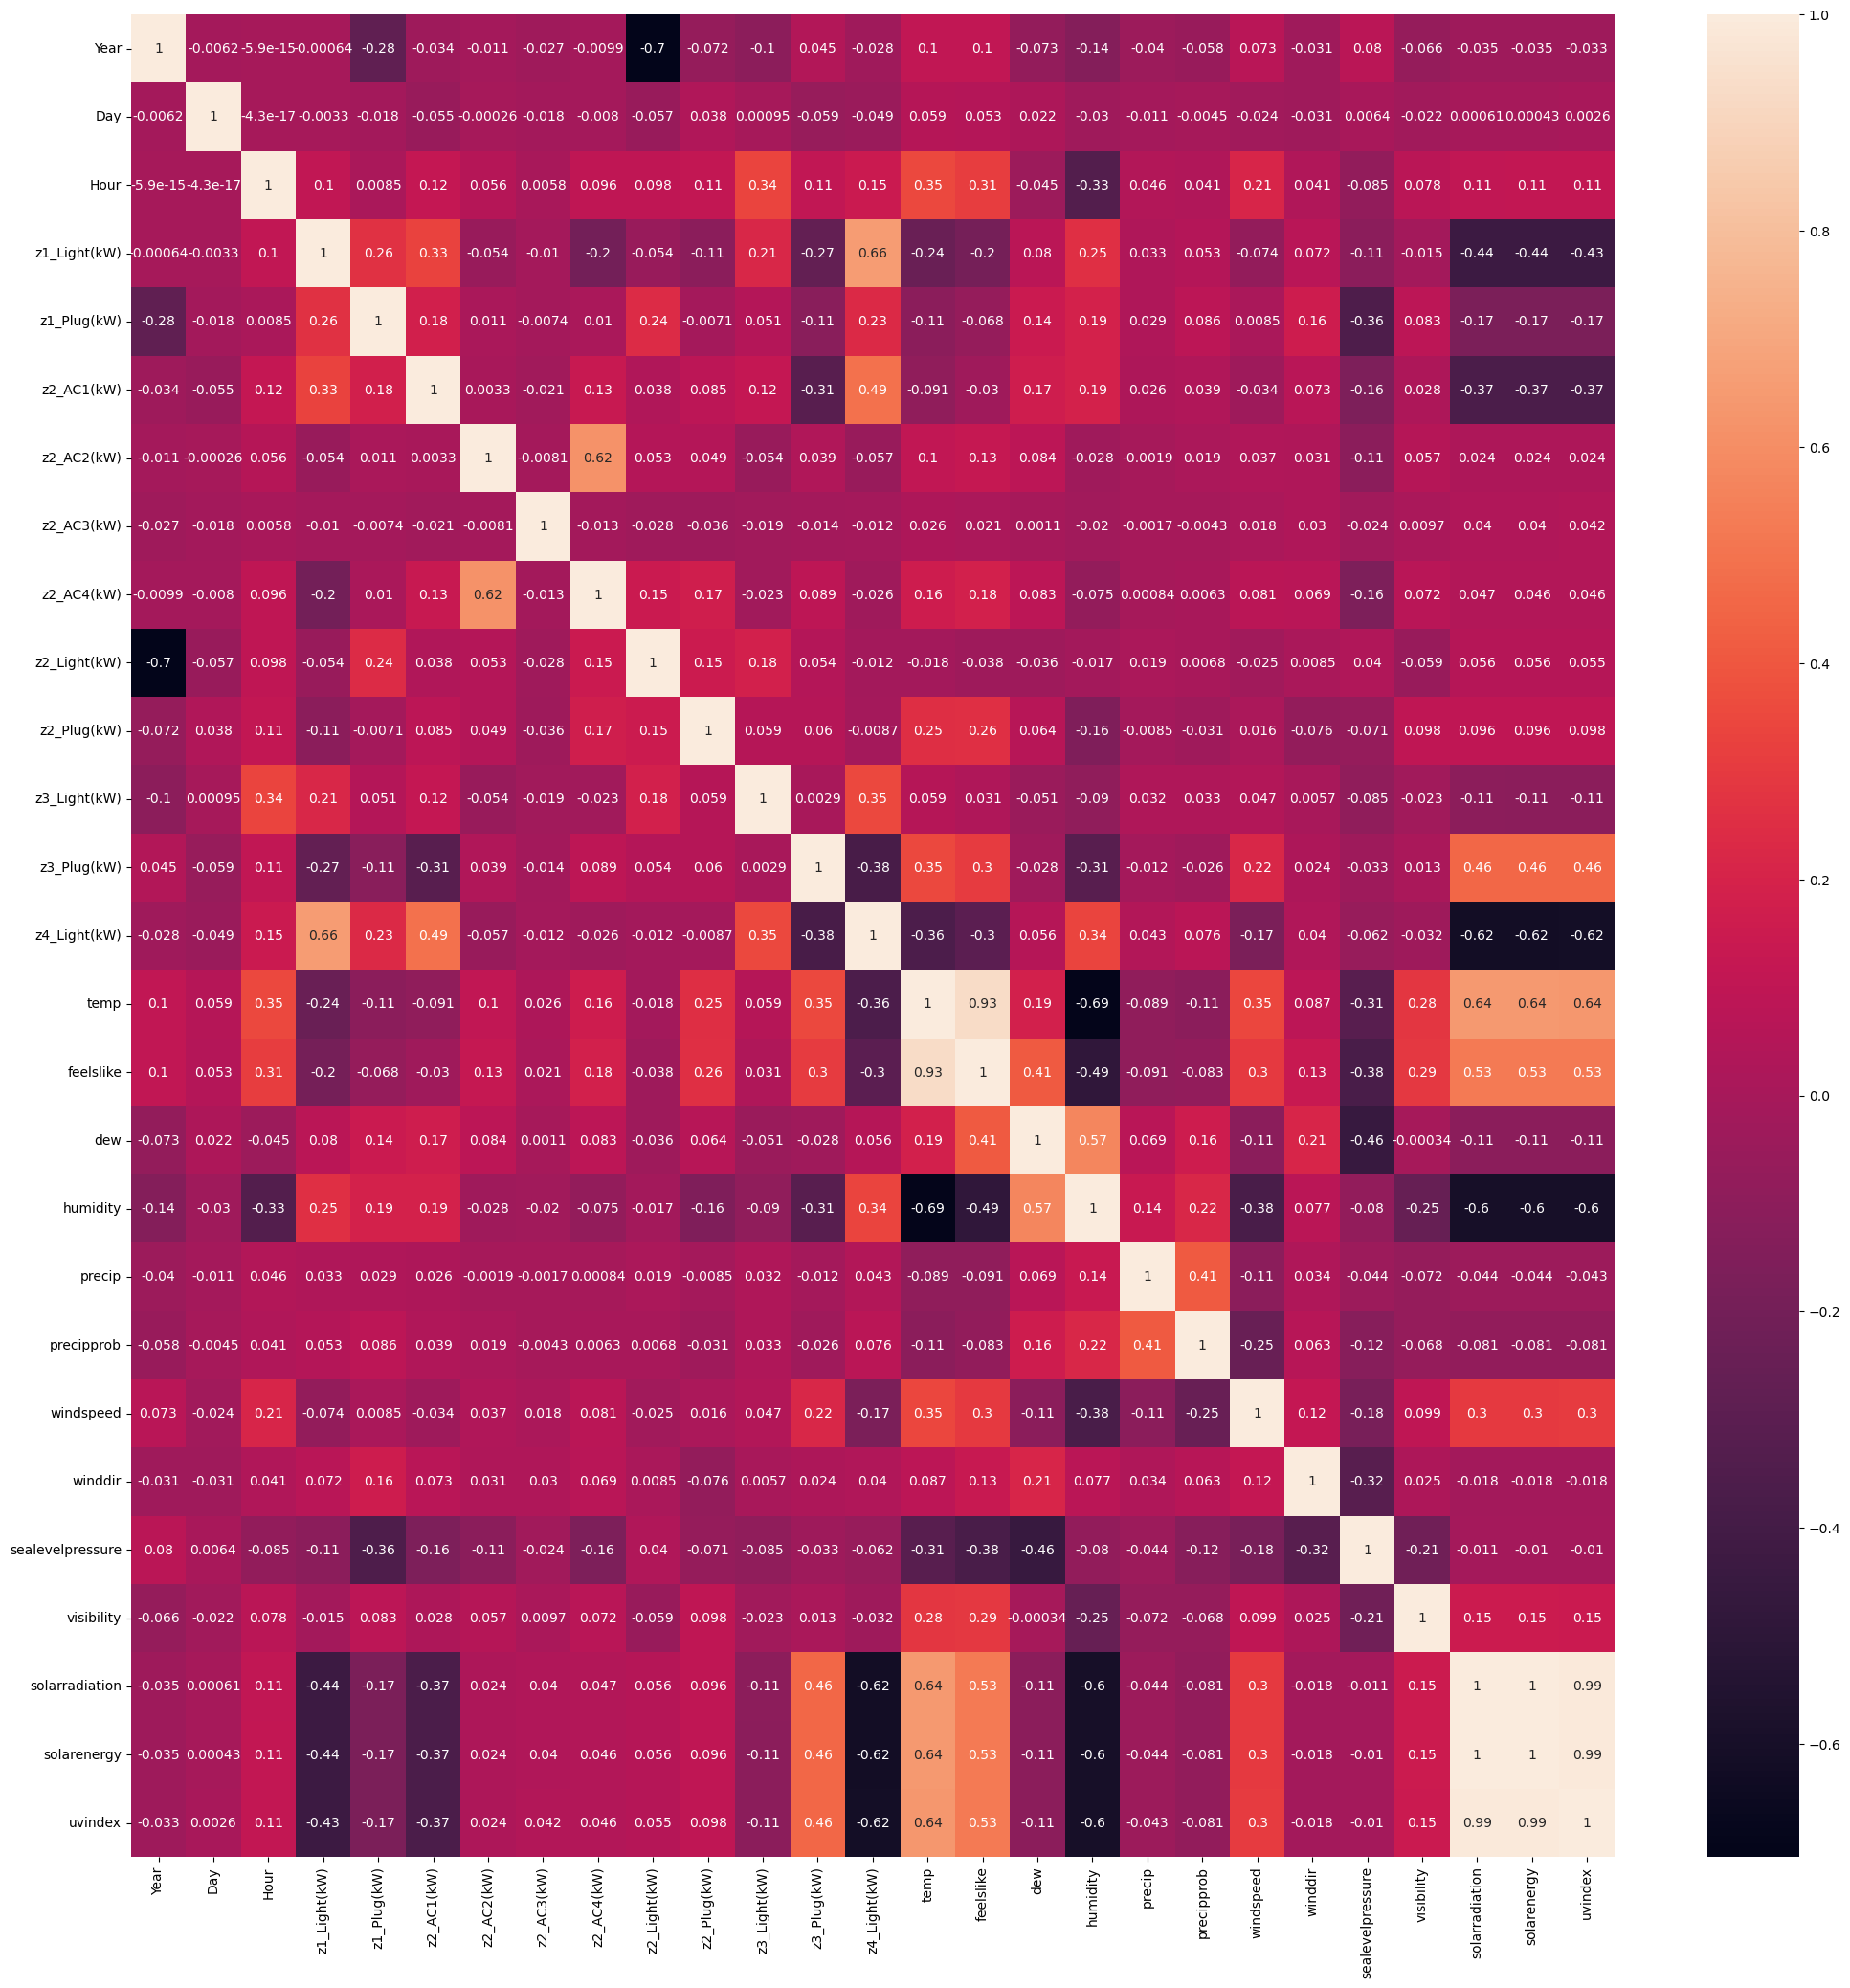

In [90]:

#creating a correlation heatmap
fig, ax=plt.subplots(figsize=(25,25))
corr=floor1_meteo.corr()
ax=sns.heatmap(corr, annot=True)
plt.show()

In [91]:
floor1_meteo.columns

Index(['Year', 'Month', 'Day', 'Hour', 'z1_Light(kW)', 'z1_Plug(kW)',
       'z2_AC1(kW)', 'z2_AC2(kW)', 'z2_AC3(kW)', 'z2_AC4(kW)', 'z2_Light(kW)',
       'z2_Plug(kW)', 'z3_Light(kW)', 'z3_Plug(kW)', 'z4_Light(kW)',
       'datetime', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'precipprob', 'preciptype', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'conditions', 'icon', 'Time'],
      dtype='object')

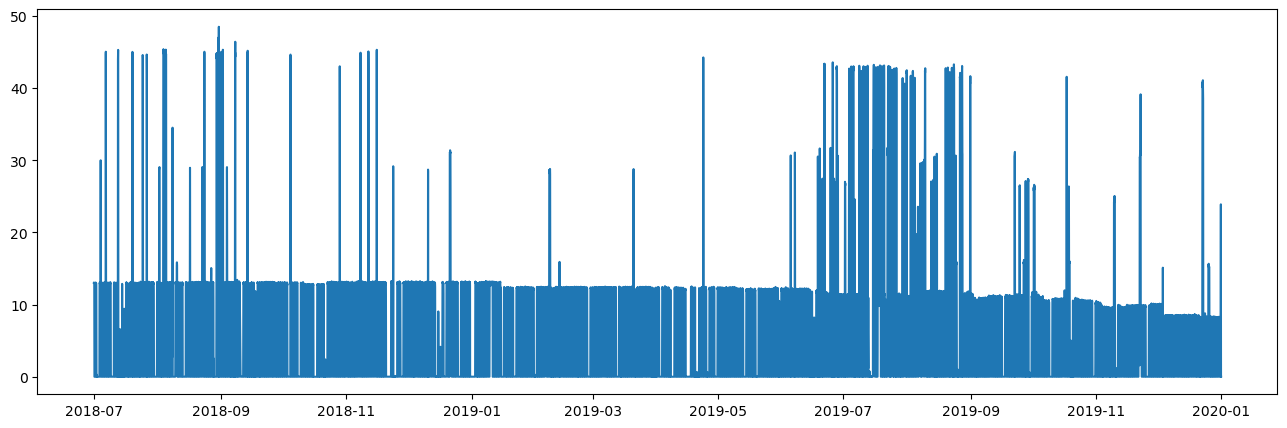

In [92]:
fig = plt.subplots(figsize=(16, 5))
plt.plot(floor1_meteo['datetime'], floor1_meteo['z1_Light(kW)'])